In [1]:
library(tidyverse)
library(repr)
library(tidymodels)
options(repr.matrix.max.rows = 6)
source("cleanup.R")

── Attaching core tidyverse packages ──────────────────────── tidyverse 2.0.0 ──
✔ dplyr     1.1.4     ✔ readr     2.1.5
✔ forcats   1.0.0     ✔ stringr   1.5.1
✔ ggplot2   3.5.1     ✔ tibble    3.2.1
✔ lubridate 1.9.3     ✔ tidyr     1.3.1
✔ purrr     1.0.2     
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()
ℹ Use the conflicted package (<http://conflicted.r-lib.org/>) to force all conflicts to become errors
── Attaching packages ────────────────────────────────────── tidymodels 1.1.1 ──

✔ broom        1.0.6     ✔ rsample      1.2.1
✔ dials        1.3.0     ✔ tune         1.1.2
✔ infer        1.0.7     ✔ workflows    1.1.4
✔ modeldata    1.4.0     ✔ workflowsets 1.0.1
✔ parsnip      1.2.1     ✔ yardstick    1.3.1
✔ recipes      1.1.0     

── Conflicts ───────────────────────────────────────── tidymodels_conflicts() ──
✖ scales::discard() masks purrr::discard()
✖ dplyr::filt

ERROR: Error in file(filename, "r", encoding = encoding): cannot open the connection


# Project Planning

## 1) Data Description 
### players.csv
- 196 observations
- 7 variables
    - experience (character): level of experience of each player
    - subscribe (logical): whether the player is subscribed to a game-related newsletter or not
    - hashedEmail (character): hashed email of each player
    - played_hours (double): hours played by each player (hr)
    - name (character): name of each player
    - gender (character): gender of each player
    - Age (double): age of each player
- Issues:
    - not tidy; variable names are not consistent (underscore vs capitalization), and variable names are not informative enough 
- Average played hours for different experience levels
    - Amateur: 6.02
    - Beginner: 1.25
    - Pro: 2.60
    - Regular: 18.21
    - Veteran: 0.65
- Average played hours: 5.85
- Average age: N/A

In [2]:
players <- read_csv("data/players.csv")
players

players_summary <- players |>
    group_by(experience) |>
    summarize(mean_hours_by_experience = mean(played_hours))
players_summary

players_avg_hour <- players |>
    summarize(mean_hours = mean(played_hours))
players_avg_hour

players_avg_age <- players |>
    summarize(mean_hours = mean(Age))
players_avg_age

Rows: 196 Columns: 7
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr (4): experience, hashedEmail, name, gender
dbl (2): played_hours, Age
lgl (1): subscribe

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


experience,subscribe,hashedEmail,played_hours,name,gender,Age
<chr>,<lgl>,<chr>,<dbl>,<chr>,<chr>,<dbl>
Pro,TRUE,f6daba428a5e19a3d47574858c13550499be23603422e6a0ee9728f8b53e192d,30.3,Morgan,Male,9
Veteran,TRUE,f3c813577c458ba0dfef80996f8f32c93b6e8af1fa939732842f2312358a88e9,3.8,Christian,Male,17
Veteran,FALSE,b674dd7ee0d24096d1c019615ce4d12b20fcbff12d79d3c5a9d2118eb7ccbb28,0.0,Blake,Male,17
⋮,⋮,⋮,⋮,⋮,⋮,⋮
Amateur,FALSE,d572f391d452b76ea2d7e5e53a3d38bfd7499c7399db299bd4fedb06a46ad5bb,0.0,Dylan,Prefer not to say,57
Amateur,FALSE,f19e136ddde68f365afc860c725ccff54307dedd13968e896a9f890c40aea436,2.3,Harlow,Male,17
Pro,TRUE,d9473710057f7d42f36570f0be83817a4eea614029ff90cf50d8889cdd729d11,0.2,Ahmed,Other,NA


experience,mean_hours_by_experience
<chr>,<dbl>
Amateur,6.0174603
Beginner,1.2485714
Pro,2.6000000
Regular,18.2083333
Veteran,0.6479167


mean_hours
<dbl>
5.845918


mean_hours
<dbl>
NA


### sessions.csv
- 1535 observations
- 5 variables
    - hashedEmail (character): hashed email of each player
    - start_time (character): start time of one session (dd/mm/yyyy time)
    - end_time (character): end time of one session (dd/mm/yyyy time)
    - original_start_time (double): start time of one session in Unix epoch time (ms)
    - original_end_time (double): end time of one session in Unix epoch time in (ms)
- Issues:
    - not tidy; one cell consists of multiple values, and variable names are not informative enough (e.g., unit, the difference between start_time and original_start_time)
- Average start time: 1.72e+12
- Average end time: N/A

In [3]:
sessions <- read_csv("data/sessions.csv")
sessions

sessions_avg_start <- sessions |>
    summarize(mean_start = mean(original_start_time))
sessions_avg_start

sessions_avg_end <- sessions |>
    summarize(mean_end = mean(original_end_time))
sessions_avg_end

Rows: 1535 Columns: 5
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr (3): hashedEmail, start_time, end_time
dbl (2): original_start_time, original_end_time

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


hashedEmail,start_time,end_time,original_start_time,original_end_time
<chr>,<chr>,<chr>,<dbl>,<dbl>
bfce39c89d6549f2bb94d8064d3ce69dc3d7e72b38f431d8aa0c4bf95ccee6bf,30/06/2024 18:12,30/06/2024 18:24,1.71977e+12,1.71977e+12
36d9cbb4c6bc0c1a6911436d2da0d09ec625e43e6552f575d4acc9cf487c4686,17/06/2024 23:33,17/06/2024 23:46,1.71867e+12,1.71867e+12
f8f5477f5a2e53616ae37421b1c660b971192bd8ff77e3398304c7ae42581fdc,25/07/2024 17:34,25/07/2024 17:57,1.72193e+12,1.72193e+12
⋮,⋮,⋮,⋮,⋮
fd6563a4e0f6f4273580e5fedbd8dda64990447aea5a33cbb5e894a3867ca44d,28/07/2024 15:36,28/07/2024 15:57,1.72218e+12,1.72218e+12
fd6563a4e0f6f4273580e5fedbd8dda64990447aea5a33cbb5e894a3867ca44d,25/07/2024 06:15,25/07/2024 06:22,1.72189e+12,1.72189e+12
36d9cbb4c6bc0c1a6911436d2da0d09ec625e43e6552f575d4acc9cf487c4686,20/05/2024 02:26,20/05/2024 02:45,1.71617e+12,1.71617e+12


mean_start
<dbl>
1.719201e+12


mean_end
<dbl>
NA


## 2) Questions
Question 1: What player characteristics and behaviours are most predictive of subscribing to a game-related newsletter, and how do these features differ between various player types?
- Can "played_hours" and "experience" predict "subscribe" in players.csv?

- "played_hours" and "experience" variables from players.csv will be used to answer the question through the process of knn classification
- the accuracy will be calculated
- Wrangling steps:
    - tidy data by changing the variable names (e.g., subscribe to newsletter_subscription)
    - select only the variables of interest ("played_hours", "experience", "subscribe")
    - mutate experience to numerical values

## 3) Exploratory Data Analysis and Visualization

In [11]:
tidy_players <- players |>
    rename(newsletter_subscription = subscribe) |>
    select(played_hours, experience, newsletter_subscription)
tidy_players

played_hours,experience,newsletter_subscription
<dbl>,<chr>,<lgl>
30.3,Pro,TRUE
3.8,Veteran,TRUE
0.0,Veteran,FALSE
⋮,⋮,⋮
0.0,Amateur,FALSE
2.3,Amateur,FALSE
0.2,Pro,TRUE


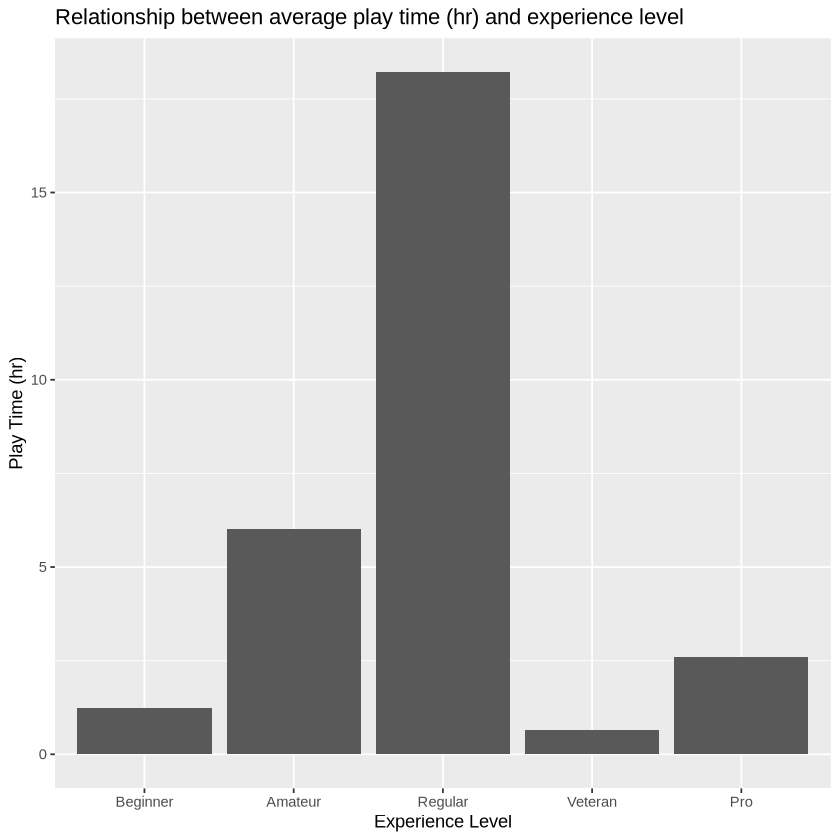

In [58]:
players_graph_1 <- players_summary |>
    ggplot(aes(x = experience, y = mean_hours_by_experience)) +
    geom_bar(stat = "identity") +
    labs(x = "Experience Level", y = "Play Time (hr)") +
    ggtitle("Relationship between average play time (hr) and experience level") +
    scale_x_discrete(limits = c("Beginner", "Amateur", "Regular", "Veteran", "Pro"))
players_graph_1

Warning message:
“Removed 66 rows containing missing values or values outside the scale range
(`geom_bar()`).”


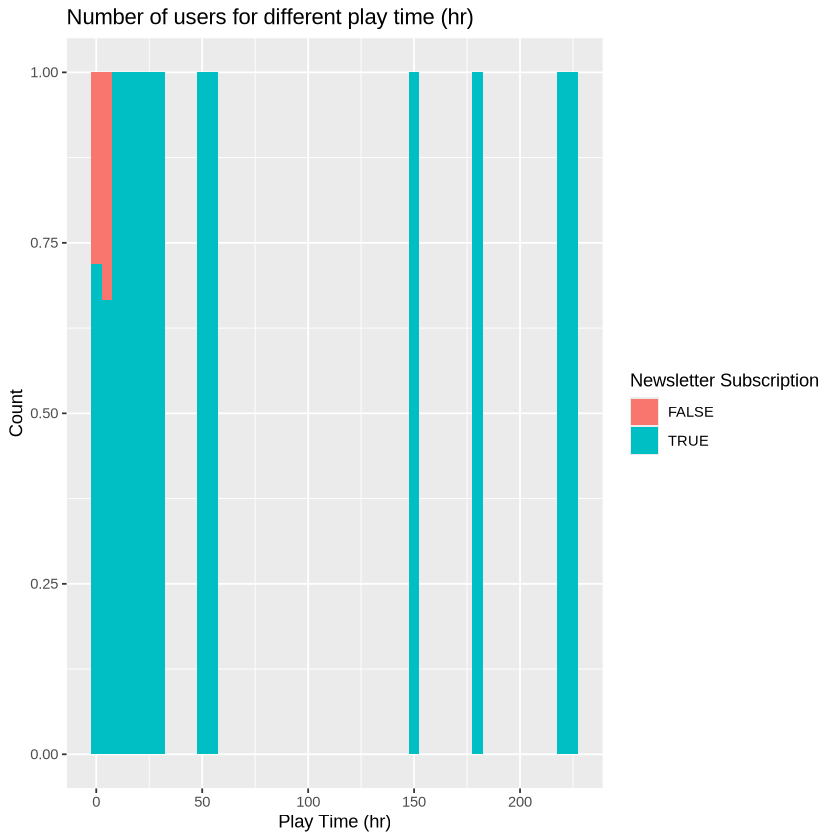

In [56]:
players_graph_2 <- tidy_players |>
    ggplot(aes(x = played_hours, fill = newsletter_subscription)) +
    geom_histogram(binwidth = 5, position = "fill") +
    labs (x = "Play Time (hr)", y = "Count", fill = "Newsletter Subscription") +
    ggtitle("Number of users for different play time (hr)")
players_graph_2

Warning message in geom_histogram(stat = "count", position = "fill"):
“Ignoring unknown parameters: `binwidth`, `bins`, and `pad`”


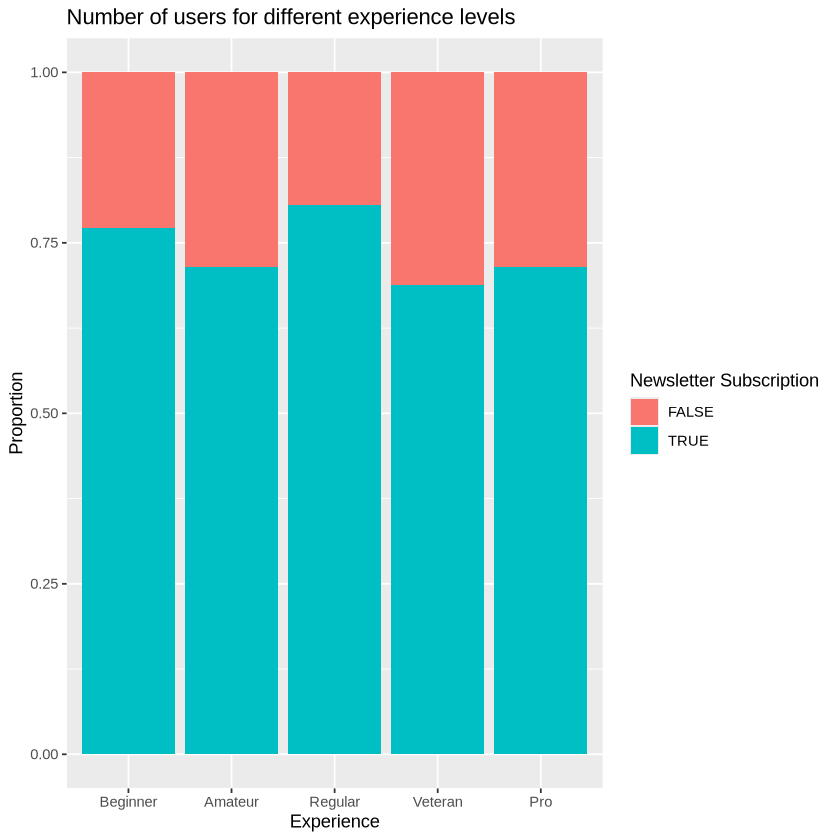

In [59]:
players_graph_3 <- tidy_players |>
    ggplot(aes(x = experience, fill = newsletter_subscription)) +
    geom_histogram(stat = "count", position = "fill") +
    labs(x = "Experience", y = "Proportion", fill = "Newsletter Subscription") +
    ggtitle("Number of users for different experience levels") +
    scale_x_discrete(limits = c("Beginner", "Amateur", "Regular", "Veteran", "Pro"))
players_graph_3

### Insights from the above graphs
- Graph 1:
    - The mean play time is the highest for the regular level of experience
    - It is the lowest for veterans
    - If we assume that the experience level increases in the order of beginner, amateur, regular, veteran, pro, we could infer that the play time increases as the level goes up until veteran
    - There is a relationship between the two variables, but not too strong
- Graph 2:
    - Most users are subscribed
    - The correlation between subscription and play time is not clear
- Graph 3:
    - The proportions of subscribed users and non-subscribed users are similar across different experience levels, with slightly higher proportions for beginner and regular
    - Similar to other graphs, there isn't a strong relationship
    - Regular users have the highest subscription rate, which is also the experience level with the longest play time

## 4) Methods and Plan
method: knn classification
- This method is more appropriate in this situation, because the response variable is categorical, not numerical.

assumptions
- The two predictor variables ("played_hours" and "experience") contain useful information to distinguish subscribers and non-subscribers
- The categorical variable ("experience") can be encoded into numerical values
- There are no extreme outliers

limitations/weaknesses
- The model does not tell what other factors may influence the subscription; only based on "played_hours" and "experience"
- The model can be inaccurate with extreme outliers and unevenly distributed data points
- The model assumes that unseen/future data would behave the same as seen/past data
- Data must be numeric
- knn is sensitive to scaling and struggles with imbalanced and large data

plan
- Split data into training and testing, where training data will further be split into training and validation sets
- Split proportion will be 75% training, 25% testing, and occurs before tuning
- 5-fold cross-validation will be done on training and validation sets to determine the best knn value by computing accuracy for each k value
- The testing data will be used at the very end to test how well the model predicts on an unseen dataset

## 5) GitHub Repository
link to GitHub repository: https://github.com/Sachi-F/dsci100-project.git